In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cubedsphere as cs

# GC-classic

In [2]:
maindir = "./sample_data/"  # change to your data folder

ds1 = xr.open_dataset(maindir+"GEOSChem.inst.20130708_0000z.nc4")

In [3]:
ds1

<xarray.Dataset>
Dimensions:           (ilev: 73, lat: 46, lev: 72, lon: 72, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2013-07-08
  * lev               (lev) float64 0.9925 0.9775 0.9625 0.9475 0.9325 ...
  * ilev              (ilev) float64 1.0 0.985 0.97 0.955 0.94 0.925 0.91 ...
  * lat               (lat) float64 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 ...
  * lon               (lon) float64 -180.0 -175.0 -170.0 -165.0 -160.0 ...
Data variables:
    hyam              (lev) float64 ...
    hybm              (lev) float64 ...
    hyai              (ilev) float64 ...
    hybi              (ilev) float64 ...
    P0                float64 ...
    AREA              (lat, lon) float32 ...
    RadDecay_Be7      (time, lev, lat, lon) float64 ...
    RadDecay_Pb       (time, lev, lat, lon) float64 ...
    RadDecay_Rn       (time, lev, lat, lon) float64 ...
    PbFromRnDecay     (time, lev, lat, lon) float64 ...
    SpeciesConc_PASV  (time, lev, lat, lon) float64 ...
    S

/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1539: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


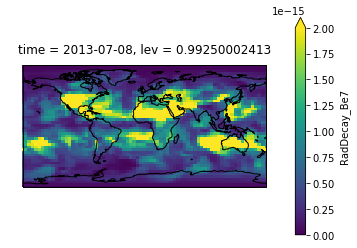

In [4]:
fig = plt.figure(figsize=[6, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ds1['RadDecay_Be7'].isel(time=0, lev=0).plot(ax=ax, vmin=0, vmax=2e-15)

# GCHP

In [5]:
ds2 = xr.open_dataset(maindir+"./GCHP.inst.20130708_0000z.nc4", chunks={'lev':10})

In [6]:
ds2

<xarray.Dataset>
Dimensions:        (lat: 144, lev: 72, lon: 24, time: 1)
Coordinates:
  * lon            (lon) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * lat            (lat) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * lev            (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * time           (time) datetime64[ns] 2013-07-08
Data variables:
    PbFromRnDecay  (time, lev, lat, lon) float64 dask.array<shape=(1, 72, 144, 24), chunksize=(1, 10, 144, 24)>
    RadDecay_Be7   (time, lev, lat, lon) float64 dask.array<shape=(1, 72, 144, 24), chunksize=(1, 10, 144, 24)>
    RadDecay_Pb    (time, lev, lat, lon) float64 dask.array<shape=(1, 72, 144, 24), chunksize=(1, 10, 144, 24)>
    RadDecay_Rn    (time, lev, lat, lon) float64 dask.array<shape=(1, 72, 144, 24), chunksize=(1, 10, 144, 24)>
    SPC_Be7        (time, lev, lat, lon) float64 dask.array<shape=(1, 72, 144, 24), chunksize=(1, 10, 144, 24)>
    SPC_PASV       (time, lev, lat, lon) float64 da

Reshape it to `(6, Nx, Nx)` so we can plot 6 panels one by one.

In [7]:
data = ds2['RadDecay_Be7'].isel(time=0, lev=0).data
data = data.reshape(6, 24, 24)

In [8]:
grid = cs.csgrid_GMAO(24)  # compute coordinate values that is needed by plotting

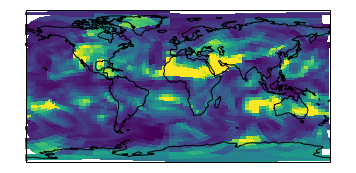

In [9]:
fig = plt.figure(figsize=[6, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

cs.plotCS_quick_raw(grid['lon_b'], grid['lat_b'],
                    data, grid['lon'], ax,
                    vmin=0, vmax=2e-15)